In [1]:
import matplotlib.pyplot as plt
import collections
import quantities as pq
import izhikevich as izhi
DELAY = 0*pq.ms
DURATION = 650 *pq.ms

# https://www.izhikevich.org/publications/spikes.htm
type2007 = collections.OrderedDict([
  #              C    k     vr  vt vpeak   a      b   c    d  celltype
  ('RS',        (100, 0.7,  -60, -40, 35, 0.01,   -2, -50,  100,  1)),
  ('IB',        (150, 1.2,  -75, -45, 50, 0.1,   5, -56,  130,   2)),
  ('TC',        (200, 1.6,  -60, -50, 35, 0.1,  15, -60,   10,   6)),
  ('TC_burst',  (200, 1.6,  -60, -50, 35, 0.1,  15, -60,   10,   6)),
  ('LTS',       (100, 1.0,  -56, -42, 40, 0.01,   8, -53,   20,   4)),
  ('CH',        (50,  1.5,  -60, -40, 25, 0.01,   1, -40,  150,   3))])

# http://www.physics.usyd.edu.au/teach_res/mp/mscripts/
# ns_izh002.m
# Fast spiking cannot be reproduced as it requires modifications to the standard Izhi equation,
# which are expressed in this mod file.
# https://github.com/OpenSourceBrain/IzhikevichModel/blob/master/NEURON/izhi2007b.mod

trans_dict = collections.OrderedDict([(k,[]) for k in ['C','k','vr','vt','vPeak','a','b','c','d','celltype']])

for i,k in enumerate(trans_dict.keys()):
    for v in type2007.values():
        trans_dict[k].append(v[i])


reduced_cells = collections.OrderedDict([(k,[]) for k in ['RS','IB','LTS','TC','TC_burst']])

params = {}
params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = DURATION


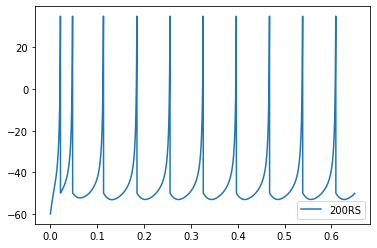

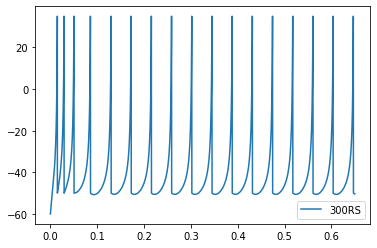

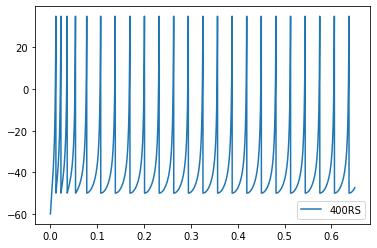

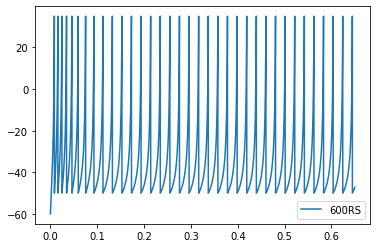

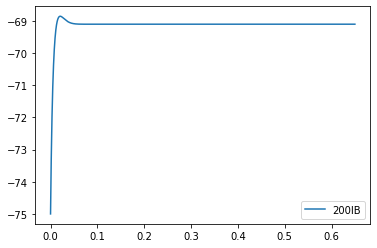

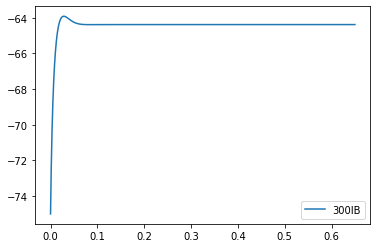

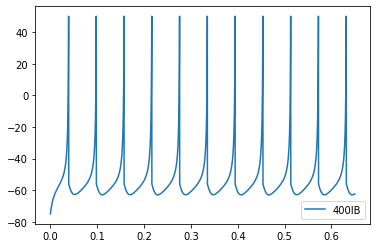

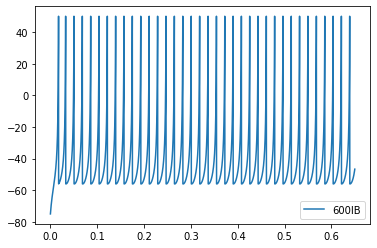

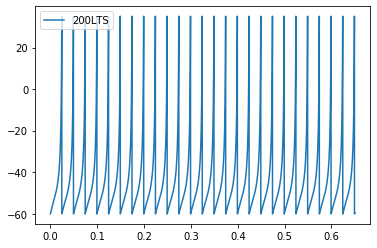

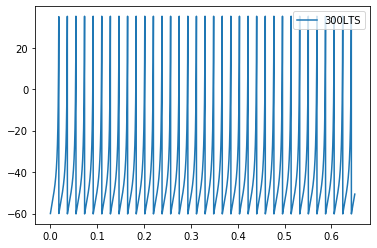

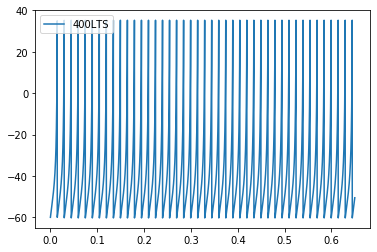

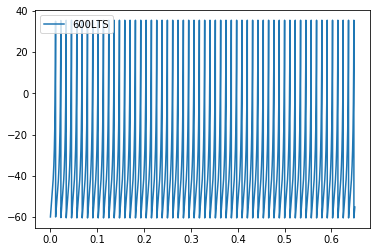

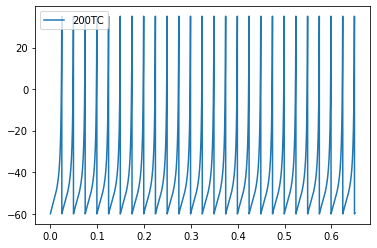

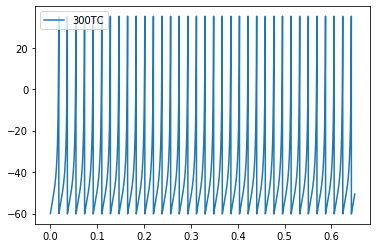

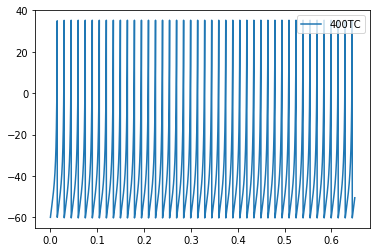

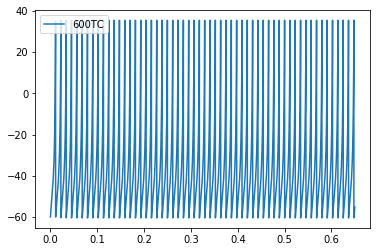

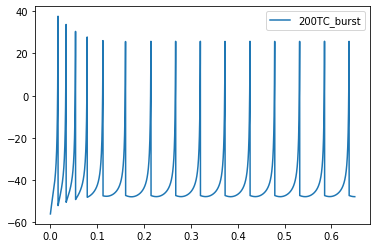

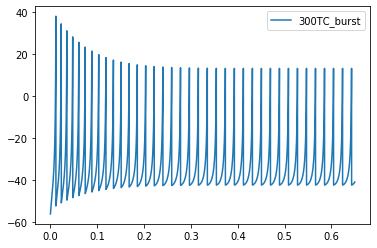

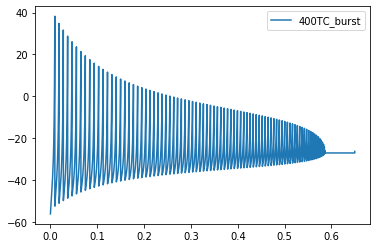

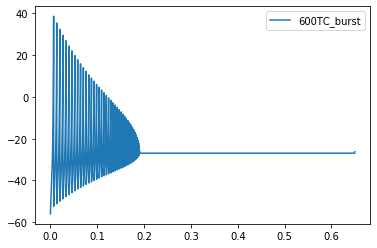

In [8]:

IinRange = [200,300,400,600]
    
for index,key in enumerate(reduced_cells.keys()):
    for amp in IinRange:
        reduced_cells[key] = {}
        for k,v in trans_dict.items():
            reduced_cells[key][k] = v[index]

        model = izhi.IZHIModel()
        model.set_attrs(reduced_cells[key])
        params['amplitude'] = amp
        model.inject_square_current(params)
        vm = model.get_membrane_potential()
        plt.plot(vm.times,vm.magnitude,label=str(amp)+str(key))
        plt.legend()
        plt.show()
        


In [3]:
#%%timeit
'''
model = izhi.IZHIModel()
#model.set_attrs(reduced_cells[key])
model.inject_square_current(params)
vm = model.get_membrane_potential()
plt.plot(vm.times,vm.magnitude)
'''

'\nmodel = izhi.IZHIModel()\n#model.set_attrs(reduced_cells[key])\nmodel.inject_square_current(params)\nvm = model.get_membrane_potential()\nplt.plot(vm.times,vm.magnitude)\n'

In [4]:
#%%timeit
'''
for index,key in enumerate(reduced_cells.keys()):
    reduced_cells[key] = {}
    for k,v in trans_dict.items():
        reduced_cells[key][k] = v[index]
    
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells[key])
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
'''

'\nfor index,key in enumerate(reduced_cells.keys()):\n    reduced_cells[key] = {}\n    for k,v in trans_dict.items():\n        reduced_cells[key][k] = v[index]\n    \n    model = izhi.IZHIModel()\n    model.set_attrs(reduced_cells[key])\n    model.inject_square_current(params)\n    vm = model.get_membrane_potential()\n'

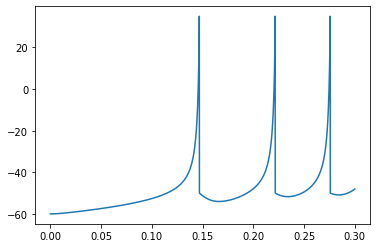

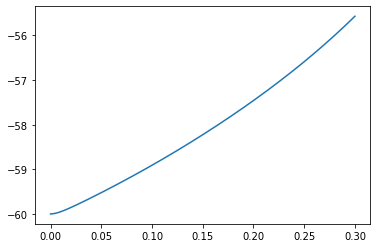

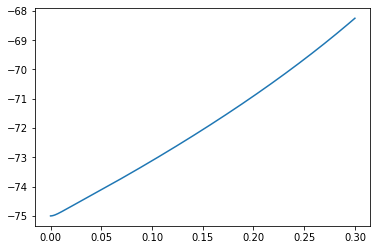

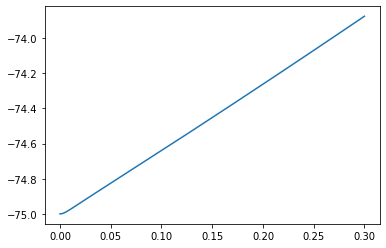

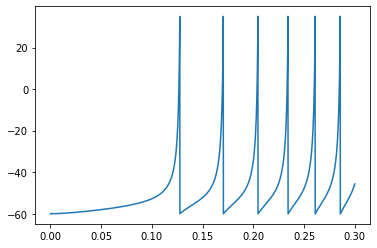

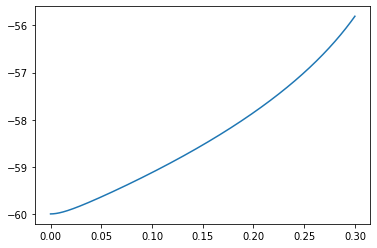

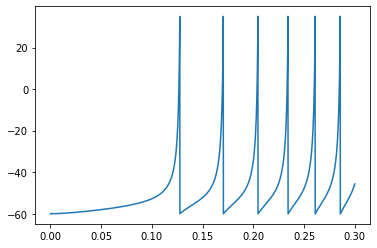

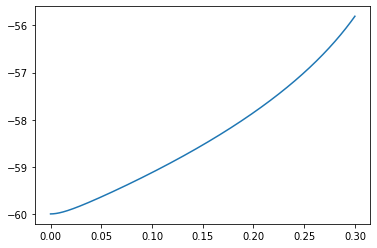

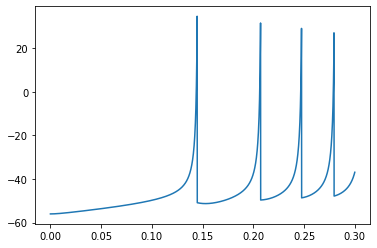

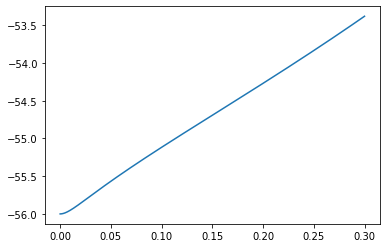

In [17]:
for index,key in enumerate(reduced_cells.keys()):
    reduced_cells[key] = {}
    for k,v in trans_dict.items():
        reduced_cells[key][k] = v[index]
    
    #model = izhi.IZHIModel()
    #model.set_attrs(reduced_cells[key])



    t_stop = 300.0
    run_ramp_simulation(key,reduced_cells,wave_form={'gradient':0.75, 'onset':0, 'baseline': t_stop*100},
                   t_stop=t_stop, title='(G) Class 1 excitable')

    # == Sub-plot H: Class 2 excitable ==========================================

    t_stop = 300.0
    run_ramp_simulation(key,reduced_cells,
                   wave_form={'gradient':0.15, 'onset':0, 'baseline':t_stop*100},
                   t_stop=t_stop, title='(H) Class 2 excitable')


In [5]:
def run_ramp_simulation(key,reduced_cells,wave_form={},t_stop=300.0, title='(G) Class 1 excitable'):
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells[key])
    vm = model.inject_ramp_current(t_stop, gradient = wave_form['gradient'], onset = wave_form['onset'], baseline= wave_form['baseline'], t_start=0.0)
    #print(vm)
    #return vm
    #model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.plot(vm.times,vm.magnitude)
    plt.show()
    return vm

    
    #from matplotlib import gridspec
    #gs1 = gridspec.GridSpecFromSubplotSpec(2, 1,
    #                                       subplot_spec=gs[j//4, j%4],
    #                                       height_ratios=[8, 1],
    #                                       hspace=0.0)
    '''
    ax1,ax2 = plt.subplot(1,2)
    #ax2 = plt.subplot(gs1[1])

    j += 1
    for ax in (ax1, ax2):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.spines['left'].set_color('None')
        ax.spines['right'].set_color('None')
        ax.spines['bottom'].set_color('None')
        ax.spines['top'].set_color('None')
        ax.set_xlim(0.0, t_stop)

    ax1.set_title(title)

    #vm = data.filter(name='v')[0]
    i_times, i_vars = stepify(times, amps)

    ax1.plot(vm.times, vm)
    ax1.set_ylim(-90, 30)

    ax2.plot(i_times, i_vars, 'g')
    ymin, ymax = amps.min(), amps.max()
    padding = (ymax - ymin)/10
    ax2.set_ylim(ymin - padding, ymax + padding)

    # scale bar
    scalebar_y = ymin + (ymax - ymin) * scalebar_level
    ax2.plot([t_stop - 20, t_stop], [scalebar_y, scalebar_y],
             color='k', linestyle='-', linewidth=1)
    if label_scalebar:
        ax.text(t_stop, ymin + padding, "20 ms", fontsize=4, horizontalalignment='right')

    plt.show(block=False)
    fig.canvas.draw()
    
    if save_data:
        datfilename = "results/%s_%s.dat" % (title.replace("(","").replace(")","").replace(" ","_"),options.simulator)

        datfile = open(datfilename,'w')
        for i in range(len(vm)):
            datfile.write('%s\t%s\n'%(vm.times[i].magnitude,vm[i][0].magnitude))
        datfile.close()
        print('   Saved data to %s'%datfilename)
    '''
    

In [7]:
fig = plt.figure(1, facecolor='white', figsize=(6, 6))
#gs = gridspec.GridSpec(5, 4)
#gs.update(hspace=0.5, wspace=0.4)

# == Sub-plot A: Tonic spiking ==============================================

t_stop = 100.0
model.set_attrs({'a':0.02, 'b':0.2, 'c':-65.0, 'd':6.0, 'vr':-70.0})

params['injected_square_current']['amplitude'] = 0.015*pq.nA
params['injected_square_current']['delay'] = 0
params['injected_square_current']['duration'] = 100*pq.ms

model.inject_square_current(params)
vm = model.get_membrane_potential()
plt.plot(vm.times,vm.magnitude)
#               waveform=step(0.014, t_stop),
#               t_stop=t_stop, title='(A) Tonic spiking',
#               label_scalebar=True, save_data=True)

# == Sub-plot B: Phasic spiking =============================================

model.set_attrs({'a':0.02, 'b':0.25, 'c':-65.0, 'd':6.0, 'vr':-64.0})

params['injected_square_current']['amplitude'] = 0.5*pq.nA
params['injected_square_current']['delay'] = 0
params['injected_square_current']['duration'] = 200*pq.ms

model.inject_square_current(params)
vm = model.get_membrane_potential()
plt.plot(vm.times,vm.magnitude)

#t_stop = 200.0
#run_simulation(a=0.02, b=0.25, c=-65.0, d=6.0, v_init=-64.0,
#               waveform=step(0.0005, t_stop),
#               t_stop=t_stop, title='(B) Phasic spiking')
#
# == Sub-plot C: Tonic bursting =============================================

#t_stop = 220.0
#run_simulation(a=0.02, b=0.2, c=-50.0, d=2.0, v_init=-70.0,
#               waveform=step(0.015, t_stop),
#               t_stop=t_stop, title='(C) Tonic bursting', save_data=True)

model.set_attrs({'a':0.02, 'b':0.2, 'c':-50.0, 'd':2.0, 'vr':-70.0})

params['injected_square_current']['amplitude'] = 0.015*pq.nA
params['injected_square_current']['delay'] = 0
params['injected_square_current']['duration'] = 2200*pq.ms

model.inject_square_current(params)
vm = model.get_membrane_potential()
plt.plot(vm.times,vm.magnitude)
plt.show()

NameError: name 'model' is not defined

<Figure size 432x432 with 0 Axes>

In [ ]:

# == Sub-plot D: Phasic bursting ============================================
'''
t_stop = 200.0
run_simulation(a=0.02, b=0.25, c=-55.0, d=0.05, v_init=-64.0,
               waveform=step(0.0006, t_stop),
               t_stop=t_stop, title='(D) Phasic bursting')

# == Sub-plot E: Mixed mode =================================================

t_stop = 160.0
run_simulation(a=0.02, b=0.2, c=-55.0, d=4.0, v_init=-70.0,
               waveform=step(0.01, t_stop),
               t_stop=t_stop, title='(E) Mixed mode')

# == Sub-plot F: Spike Frequency Adaptation (SFA) ===========================

t_stop = 85.0
run_simulation(a=0.01, b=0.2, c=-65.0, d=8.0, v_init=-70.0,
               waveform=step(0.03, t_stop),
               t_stop=t_stop, title='(F) SFA')

# == Sub-plot G: Class 1 excitable ==========================================


Note: This simulation is supposed to use a different parameterization of the
      model, i.e.
            V' = tau*(0.04*V^2 + 4.1*V + 108 -u + I)
      as opposed to
            V' = tau*(0.04*V^2 + 5*V + 140 - u + I)
The alternative parameterization is not currently available in PyNN, therefore
the results of this simulation are not expected to match the original figure.


t_stop = 300.0
run_simulation(a=0.02, b=0.2, c=-65.0, d=6.0, v_init=-70.0,
               waveform=ramp(0.000075, 30.0, t_stop),
               t_stop=t_stop, title='(G) Class 1 excitable')

# == Sub-plot H: Class 2 excitable ==========================================

t_stop = 300.0
run_simulation(a=0.2, b=0.26, c=-65.0, d=0.0, v_init=-64.0,
               waveform=ramp(0.000015, 30.0, t_stop, baseline=-0.0005),
               t_stop=t_stop, title='(H) Class 2 excitable')

# == Sub-plot I: Spike latency ==============================================

t_stop = 100.0
run_simulation(a=0.02, b=0.2, c=-65.0, d=6.0, v_init=-70.0,
               waveform=pulse(0.00671,  # 0.00704 in original
                              [10], 3, t_stop),
               t_stop=t_stop, title='(I) Spike latency',
               scalebar_level=0.5)

# == Sub-plot J: Subthreshold oscillation ===================================

t_stop = 200.0
run_simulation(a=0.05, b=0.26, c=-60.0, d=0.0, v_init=-62.0,
               waveform=pulse(0.002, [20], 5, t_stop),
               t_stop=t_stop, title='(J) Subthreshold oscillation',
               scalebar_level=0.5)

# == Sub-plot K: Resonator ==================================================

t_stop = 400.0
T1 = t_stop / 10
T2 = T1 + 20
T3 = 0.7 * t_stop
T4 = T3 + 40
run_simulation(a=0.1, b=0.26, c=-60.0, d=-1.0, v_init=-62.0,
               waveform=pulse(0.00065, [T1, T2, T3, T4], 4, t_stop),
               t_stop=t_stop, title='(K) Resonator',
               scalebar_level=0.5)

# == Sub-plot L: Integrator =================================================


Note: This simulation is supposed to use a different parameterization of the
      model, i.e.
            V' = tau*(0.04*V^2 + 4.1*V + 108 -u + I)
      as opposed to
            V' = tau*(0.04*V^2 + 5*V + 140 - u + I)
The alternative parameterization is not currently available in PyNN, therefore
the results of this simulation are not expected to match the original figure.


t_stop = 100.0
T1 = t_stop / 11
T2 = T1 + 5
T3 = 0.7 * t_stop
T4 = T3 + 10
run_simulation(a=0.02, b=-0.1, c=-55.0, d=6.0, v_init=-60.0,
               waveform=pulse(0.009, [T1, T2, T3, T4], 2, t_stop),
               t_stop=t_stop, title='(L) Integrator',
               scalebar_level=0.5)

# == Sub-plot M: Rebound spike ==============================================

t_stop = 200.0
run_simulation(a=0.03, b=0.25, c=-60.0, d=4.0, v_init=-64.0,
               waveform=pulse(-0.015, [20], 5, t_stop),
               t_stop=t_stop, title='(M) Rebound spike')

# == Sub-plot N: Rebound burst ==============================================

t_stop = 200.0
run_simulation(a=0.03, b=0.25, c=-52.0, d=0.0, v_init=-64.0,
               waveform=pulse(-0.015, [20], 5, t_stop),
               t_stop=t_stop, title='(N) Rebound burst')

# == Sub-plot O: Threshold variability ======================================

t_stop = 100.0
times = np.array([0, 10, 15, 70, 75, 80, 85, t_stop])
amps = np.array([0, 0.001, 0, -0.006, 0, 0.001, 0, 0])
run_simulation(a=0.03, b=0.25, c=-60.0, d=4.0, v_init=-64.0,
               waveform=(times, amps),
               t_stop=t_stop, title='(O) Threshold variability')

# == Sub-plot P: Bistability ================================================

t_stop = 300.0
T1 = t_stop/8
T2 = 208  # 216.0 in original
run_simulation(a=0.1, b=0.26, c=-60.0, d=0.0, v_init=-61.0,
               waveform=pulse(0.00124, [T1, T2], 5, t_stop, baseline=0.00024),
               t_stop=t_stop, title='(P) Bistability',
               scalebar_level=0.5)

# == Sub-plot Q: Depolarizing after-potential ===============================

t_stop = 50.0
run_simulation(a=1.0, b=0.18,  # 0.2 in original
               c=-60.0, d=-21.0, v_init=-70.0,
               waveform=pulse(0.02, [9], 2, t_stop),
               t_stop=t_stop, title='(Q) DAP',
               scalebar_level=0.5)

# == Sub-plot R: Accomodation ===============================================


Note: This simulation is supposed to use a different parameterization of the
      model, i.e.
            u' = tau*a*(b*(V + 65))
      as opposed to
            u' = tau*a*(b*V - u)
The alternative parameterization is not currently available in PyNN, therefore
the results of this simulation are not expected to match the original figure.


t_stop = 400.0

parts = (ramp(0.00004, 0.0, 200.0),
         (np.array([200.0 + global_time_step, 300.0 - global_time_step]), np.array([0.0, 0.0])),
         ramp(0.00032, 300.0, 312.5, t_start=300.0),
         (np.array([312.5 + global_time_step, t_stop]), np.array([0.0, 0.0])))
totalTimes, totalAmps = np.hstack(parts)

run_simulation(a=0.02, b=1.0, c=-55.0, d=4.0, v_init=-65.0, u_init=-16.0,
               waveform=(totalTimes, totalAmps),
               t_stop=t_stop, title='(R) Accomodation',
               scalebar_level=0.5)

# == Sub-plot S: Inhibition-induced spiking =================================

t_stop = 350.0
run_simulation(a=-0.02, b=-1.0, c=-60.0, d=8.0, v_init=-63.8,
               waveform=pulse(0.075, [50], 170,  # 200 in original
                              t_stop, baseline=0.08),
               t_stop=t_stop, title='(S) Inhibition-induced spiking')

# == Sub-plot T: Inhibition-induced bursting ================================


Modifying parameter d from -2.0 to -0.7 in order to reproduce Fig. 1
'

t_stop = 350.0
run_simulation(a=-0.026, b=-1.0, c=-45.0, d=-0.7, v_init=-63.8,
               waveform=pulse(0.075, [50], 200, t_stop, baseline=0.08),
               t_stop=t_stop, title='(T) Inhibition-induced bursting')


# == Export figure in PNG format ============================================

filename = normalized_filename("results", "izhikevich2004", "png", options.simulator)
try:
    os.makedirs(os.path.dirname(filename))
except OSError:
    pass
fig.savefig(filename)

print("\n  Simulation complete. Results can be seen in figure at %s\n"%(filename))
'''


In [ ]:
c
